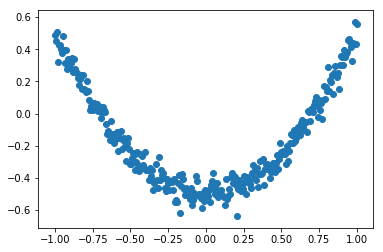

0.2751595
0.03689173
0.014572821
0.00989846
0.0080925245
0.006641671
0.005554232
0.004842331
0.0043285857
0.003999767
0.0037617898
0.0035807001
0.0034378138
0.0033341364
0.003244887
0.0031651007
0.00309774
0.00303873
0.002995361
0.0029535776
0.0029158893
0.0028840178
0.0028508266
0.0028274762
0.002807983
0.0027909952
0.0027733312
0.0027563495
0.002741305
0.0027276254
0.002715499
0.0027040346
0.002695264
0.0026885786
0.0026829613
0.0026781636
0.0026740711
0.0026706704
0.0026677977
0.0026653416
0.0026627898
0.0026604964
0.002658524
0.0026564049
0.0026544451
0.0026527578
0.0026514188
0.0026499624
0.0026482223
0.0026467163
0.00264538
0.0026424949
0.0026397347
0.0026366536
0.0026350706
0.0026339462
0.0026328857
0.002631426
0.0026301774
0.002629056
0.0026280277
0.002627077
0.002626191
0.0026253576
0.002624574
0.0026238267
0.0026231087
0.0026224032
0.0026216276
0.0026209378
0.002620279
0.00261971
0.002619167
0.0026186416
0.0026181333
0.002617629
0.0026171398
0.0026166597
0.0026161843
0.002615

In [2]:
#怎么构建一个可视化的tensorboard
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#添加神经网络层
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs
    
#生成用于训练的数据
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

#添加用于输入，输出数据的placeholder
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

#添加隐藏层
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)

#添加输出层
prediction = add_layer(l1,10,1,activation_function=None)

#设置代价函数
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#神经网络最重要的一步就是初始化全局所有要用到的变量

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# #把生成的数据可视化

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

#开始训练数据
for i in range(10000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
